In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt  

# Read the data

In [2]:
df = pd.read_csv("C:\\Users\\505DY\\Desktop\\Machine Learning\\Self Note\\CSV_file\\dialysis_data.csv")

# Checking Missing Value

In [3]:
print(df.isna().sum())
print("---------------------------------------------")
print(df.isnull().sum())

Infect              0
qHctSD              0
qPotassSD           0
qAlbuminSD          0
qHgbSD              0
qCaTotalSD          0
qPhosphSD           0
qDiastolicSD        0
qSodiumSD           0
qWhBldCntLast       0
qBicarbSD           0
qBicarbTrend        0
qPotassLast         0
qSodiumTrend        0
qSystolicTrend      0
qSystolicLast       0
qNeutrophilsLast    0
qPulseSD            0
qBicarbLast         0
qHctTrend           0
qDiastolicLast      0
qCaTotalTrend       0
qCaTotalLast        0
qWhBldCntTrend      0
qGlucoseSD          0
qSystolicSD         0
qLymphSD            0
qWeightVitalSD      0
qLymphLast          0
PatientAge          0
PDVintage           0
dtype: int64
---------------------------------------------
Infect              0
qHctSD              0
qPotassSD           0
qAlbuminSD          0
qHgbSD              0
qCaTotalSD          0
qPhosphSD           0
qDiastolicSD        0
qSodiumSD           0
qWhBldCntLast       0
qBicarbSD           0
qBicarbTrend     

# Checking the variance

In [4]:
print(df.var())

Infect              1.826286e-01
qHctSD              3.487115e+00
qPotassSD           8.501552e-02
qAlbuminSD          2.287829e-02
qHgbSD              5.225531e-01
qCaTotalSD          1.436364e-01
qPhosphSD           1.366975e+00
qDiastolicSD        2.498762e+01
qSodiumSD           1.041452e+01
qWhBldCntLast       2.004874e+07
qBicarbSD           5.223299e+00
qBicarbTrend        4.679446e+00
qPotassLast         6.050565e-01
qSodiumTrend        5.674604e+00
qSystolicTrend      9.117878e+03
qSystolicLast       4.225671e+05
qNeutrophilsLast    1.050540e+02
qPulseSD            2.388513e+02
qBicarbLast         2.818892e+01
qHctTrend           8.049923e+00
qDiastolicLast      2.270544e+02
qCaTotalTrend       2.497921e-01
qCaTotalLast        1.104012e+00
qWhBldCntTrend      2.838990e+06
qGlucoseSD          6.637251e+02
qSystolicSD         1.159603e+05
qLymphSD            1.765622e+05
qWeightVitalSD      8.150256e+03
qLymphLast          1.034768e+05
PatientAge          1.830387e+02
PDVintage 

# Expressing The Bar

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


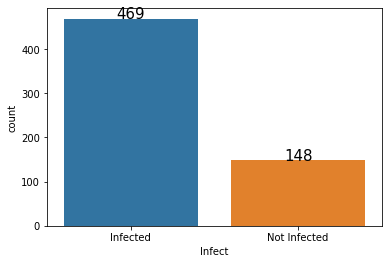

In [5]:
g = sb.countplot(df['Infect'])
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{}'.format(height), 
               horizontalalignment='center',fontsize=15)
g.set_xticklabels(['Infected','Not Infected'])
plt.show()

c:\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Percentage of patients will/will not have Peritoneal')

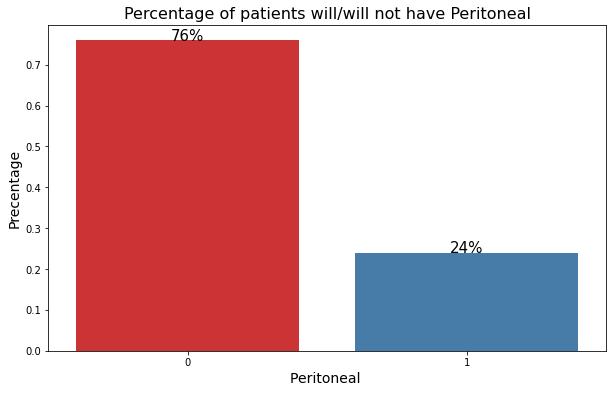

In [6]:
plt.figure(figsize=(10,6))
g = sb.barplot(df['Infect'], df['Infect'], palette='Set1', estimator=lambda x: len(x) / len(df) )

#Anotating the graph
for p in g.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        g.text(x+width/2, 
               y+height, 
               '{:.0%}'.format(height), 
               horizontalalignment='center',fontsize=15)

#Setting the labels
plt.xlabel('Peritoneal ', fontsize=14)
plt.ylabel('Precentage', fontsize=14)
plt.title('Percentage of patients will/will not have Peritoneal', fontsize=16)

# Separating data into X and Y 

In [7]:
X = df.drop("Infect",axis=1)
Y = df[["Infect"]]

# Checking The "Infect" Value

In [8]:
Y.value_counts()

Infect
0         469
1         148
dtype: int64

# Feature filtration by using correlation

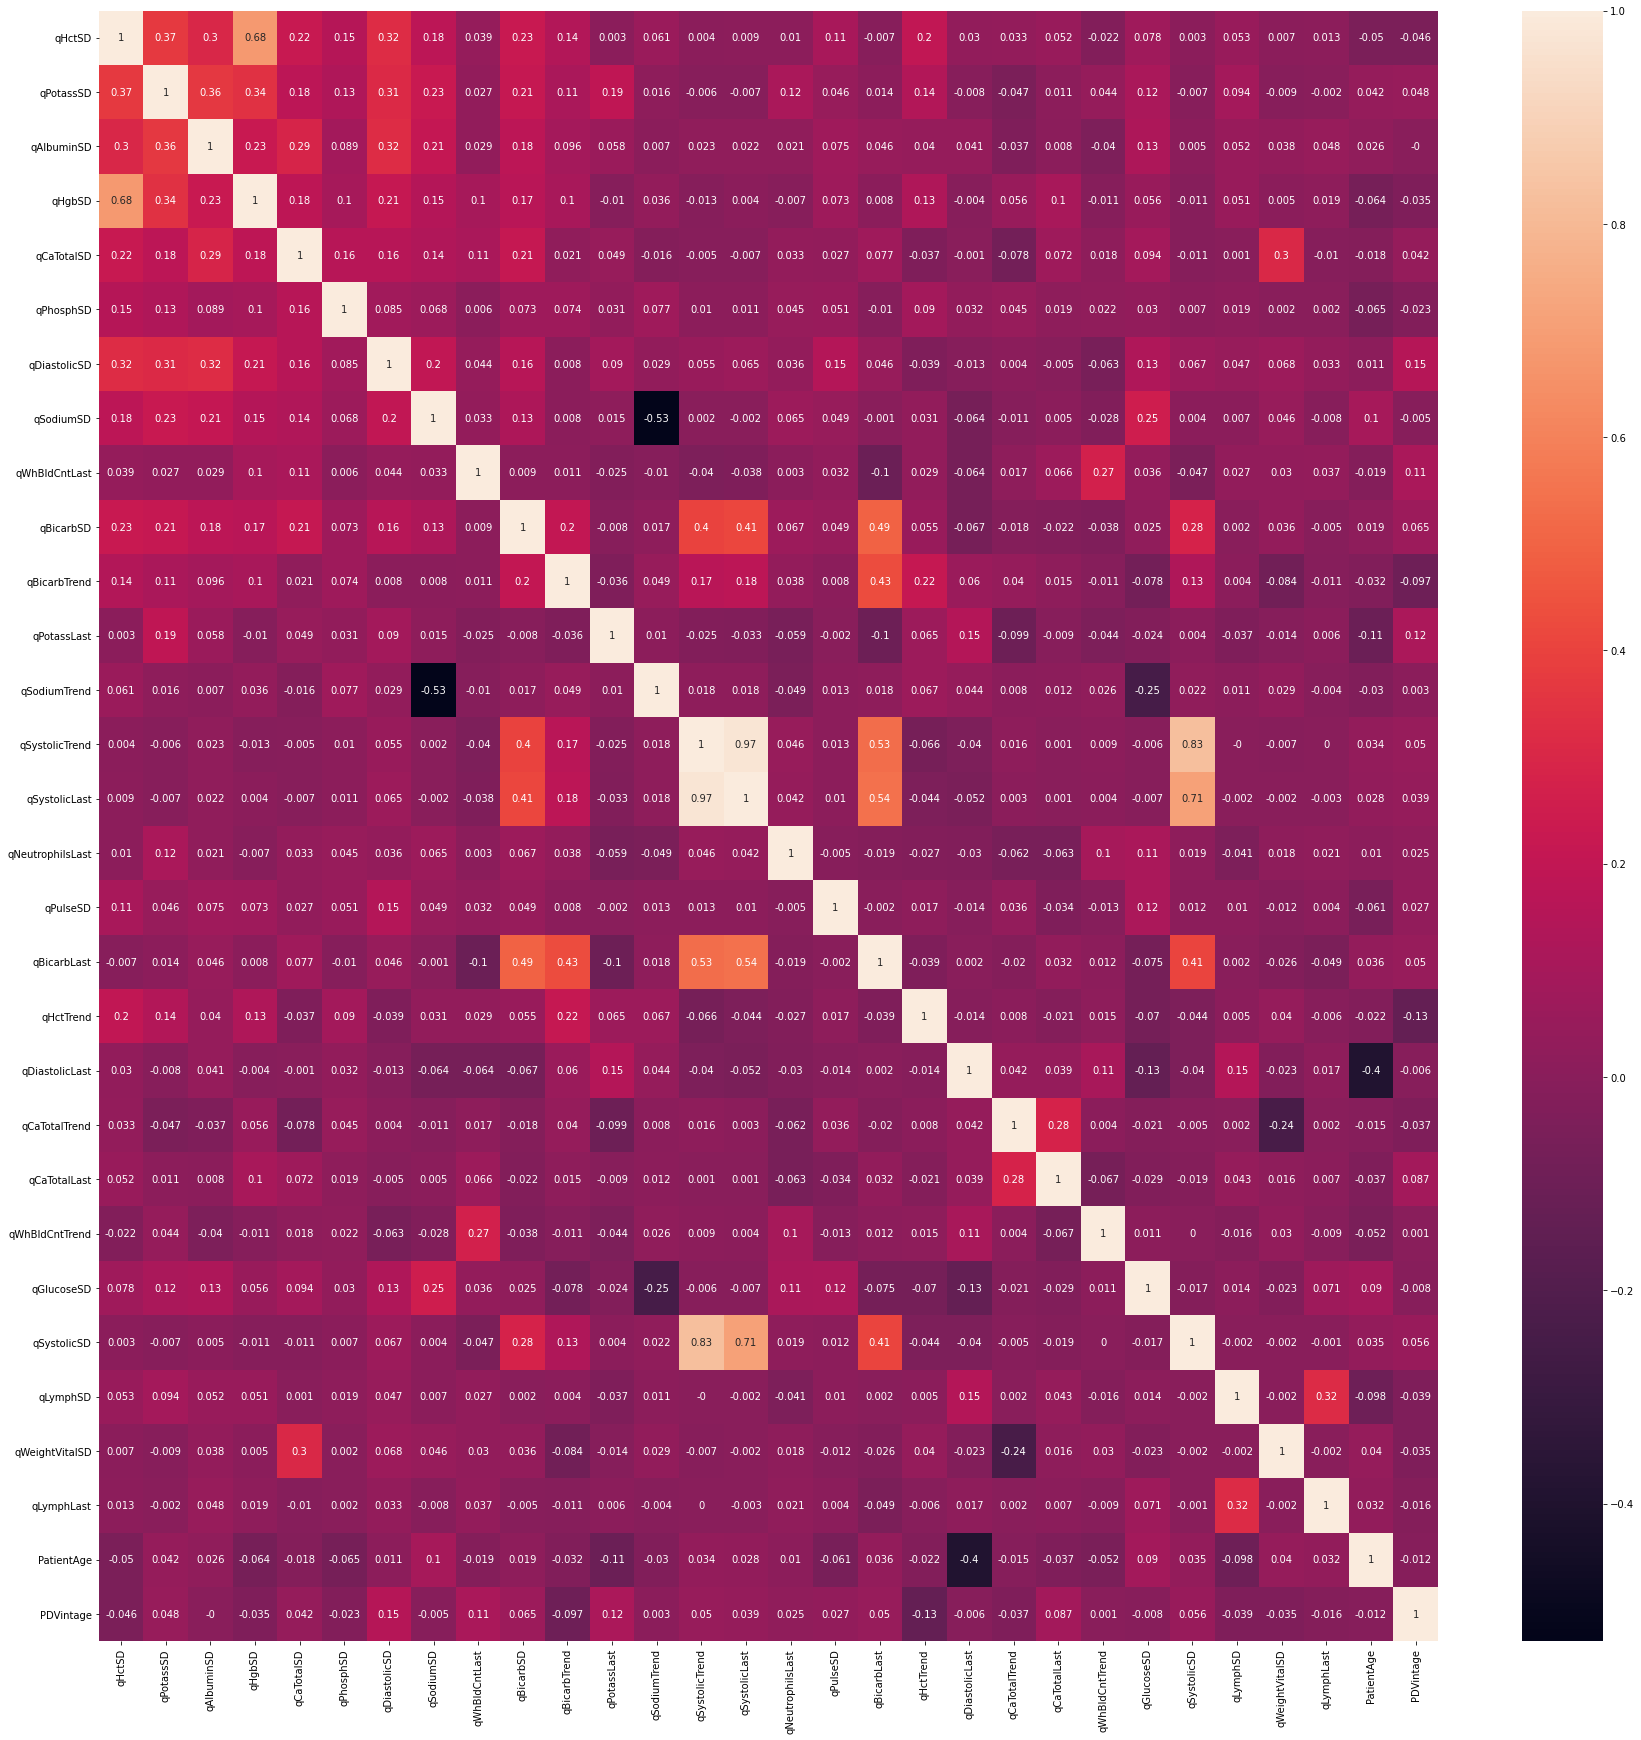

In [9]:
plt.figure(figsize=(30,30))
corr = X.corr()
sb.heatmap(round(corr,3),annot=True)
plt.show()

In [10]:
X.columns

Index(['qHctSD', 'qPotassSD', 'qAlbuminSD', 'qHgbSD', 'qCaTotalSD',
       'qPhosphSD', 'qDiastolicSD', 'qSodiumSD', 'qWhBldCntLast', 'qBicarbSD',
       'qBicarbTrend', 'qPotassLast', 'qSodiumTrend', 'qSystolicTrend',
       'qSystolicLast', 'qNeutrophilsLast', 'qPulseSD', 'qBicarbLast',
       'qHctTrend', 'qDiastolicLast', 'qCaTotalTrend', 'qCaTotalLast',
       'qWhBldCntTrend', 'qGlucoseSD', 'qSystolicSD', 'qLymphSD',
       'qWeightVitalSD', 'qLymphLast', 'PatientAge', 'PDVintage'],
      dtype='object')

# Checking Low Variance 

In [11]:
from sklearn.preprocessing import RobustScaler as Scaler
Xsc = Scaler().fit_transform(X=X)
df_sc = pd.DataFrame(Xsc, columns=X.columns)
print(df_sc.var().sort_values(ascending = False).round(5) *1000)

qWhBldCntTrend      66579042.91
qLymphSD            21982151.59
qWeightVitalSD       3517909.64
qLymphLast           1538916.60
qSystolicSD           807767.21
qSystolicLast         326054.86
qSystolicTrend        142466.85
qPulseSD                6843.55
qPhosphSD               5011.92
qCaTotalTrend           4635.19
qBicarbTrend            4164.69
qSodiumSD               3635.30
qHctTrend               3617.83
qSodiumTrend            3471.25
qGlucoseSD              2927.96
qBicarbSD               2611.65
qBicarbLast             1332.18
qCaTotalSD              1281.67
qHgbSD                  1005.52
qNeutrophilsLast         852.64
qAlbuminSD               819.51
qPotassSD                727.50
qPotassLast              699.57
qHctSD                   678.62
qCaTotalLast             653.26
PatientAge               633.35
PDVintage                563.78
qDiastolicSD             557.06
qDiastolicLast           469.12
qWhBldCntLast            422.05
dtype: float64


#  Dividing data into train and test

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=.25, random_state=0, stratify=Y)
xtrain

,qHctSD,qPotassSD,qAlbuminSD,qHgbSD,qCaTotalSD,qPhosphSD,qDiastolicSD,qSodiumSD,qWhBldCntLast,qBicarbSD,...,qCaTotalTrend,qCaTotalLast,qWhBldCntTrend,qGlucoseSD,qSystolicSD,qLymphSD,qWeightVitalSD,qLymphLast,PatientAge,PDVintage
83,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.116328,0.000000,5900.00,0.000000,...,-0.011418,10.10,-2.650000e-16,0.000000,29.147136,0.000000,2.933712,36.0,68,2.839151
165,1.479020,0.180278,0.163936,0.698212,0.286138,0.604152,1.920286,3.112475,7.76,25.695330,...,0.130000,9.70,-3.140450e+02,5.787918,6.383573,4.085569,6.238740,19.0,52,7.860370
499,1.787612,0.505800,0.474927,0.604612,0.609417,0.421966,11.260797,1.707825,6800.00,3.287180,...,-0.065714,7.80,-7.428571e+00,40.500000,14.088017,5.356071,2.441994,20.0,31,0.908966
282,3.517652,0.171213,0.100000,1.369306,0.491808,0.331662,13.557491,2.683540,6.10,1.707825,...,0.030000,8.40,7.100000e-01,11.500000,27.243423,1.334869,1.652703,17.3,63,2.702259
155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.60,0.000000,...,-0.011418,8.50,-2.650000e-16,0.000000,0.000000,0.000000,0.000000,20.1,61,0.010951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1.247219,0.294392,0.188562,0.410961,0.368179,0.464280,5.656854,1.699673,6.25,1.699673,...,-0.250000,8.10,-7.000000e-02,15.937377,12.498889,4.320494,0.816497,28.0,66,1.850787
316,2.309519,0.835703,0.160000,0.939361,0.150000,0.449691,10.131140,0.800000,5470.00,1.600000,...,-0.300000,8.10,-2.000000e+01,40.687099,18.800000,2.909440,0.433013,21.4,48,3.931554
20,7.488783,0.458258,0.223607,2.437596,0.023570,0.402337,8.466847,1.414214,5120.00,1.149728,...,-0.025000,8.75,5.420000e+02,4.320494,12.833063,4.100229,1.465435,19.5,58,0.027379
559,2.449490,0.556709,0.000000,0.734847,0.000000,0.000000,5.000000,1.650000,5280.00,1.991231,...,-0.011418,7.90,-1.315000e+03,45.762673,8.291562,6.847546,2.277608,44.0,54,0.095825


# Scaling the features

In [61]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)
xtrain

array([[-1.27043871, -1.3181952 , -1.22981139, ..., -0.01145892,
         0.87509139,  0.5582955 ],
       [-0.500589  , -0.70231533, -0.12511913, ..., -0.0572447 ,
        -0.30039027,  3.13000655],
       [-0.33996286,  0.40976164,  1.97051181, ..., -0.05455142,
        -1.84320994, -0.43028481],
       ...,
       [ 2.62757337,  0.2473441 ,  0.27697635, ..., -0.05589806,
         0.14041535, -0.88180659],
       [ 0.00455354,  0.5836827 , -1.22981139, ...,  0.01008733,
        -0.15345506, -0.84675055],
       [ 0.05687047, -0.97656652,  1.53299805, ...,  0.05317983,
        -0.37385787, -0.55227982]])

# Dealing with Imbalanced Values

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
xtrain,ytrain = smote.fit_resample(xtrain, ytrain)

# \#------------------------------RandomForestClassifier---------------------------------------#

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion="gini",random_state=0,class_weight="balanced")
classifier.fit(xtrain, ytrain)

<ipython-input-15-5e896e6c3845>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(xtrain, ytrain)


RandomForestClassifier(class_weight='balanced', random_state=0)

# Predict model

In [16]:
ypred = classifier.predict(xtest)

# GridSearchCV 

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators'      : [10,20,30,40,50,60,70],
    'max_depth'         : [1,2,3,4,5,6,7,8,9,10],
    'random_state'      : [0],
    'criterion' :['gini','entropy']
}
grid_search = GridSearchCV(classifier ,param_grid,refit = True, verbose=0,n_jobs=-1,scoring='f1',cv=10)
grid_search.fit(xtrain,ytrain)
grid_search.best_params_

c:\python38\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 70, 'random_state': 0}

# Retrainning

In [18]:
classifier = RandomForestClassifier(
    n_estimators= 70,
    criterion="entropy",
    max_depth= 10,
    random_state=0,
    class_weight="balanced")
classifier.fit(xtrain, ytrain)

<ipython-input-18-c982b1163068>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(xtrain, ytrain)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, n_estimators=70, random_state=0)

In [19]:
ypred = classifier.predict(xtest)

# ROC AUC

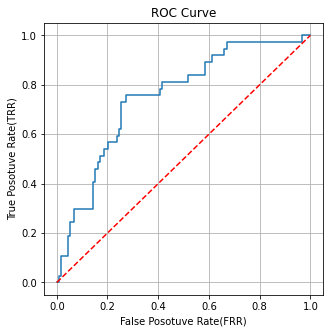

In [20]:
from sklearn.metrics import roc_curve, auc
ll=[0,1]
ur=[0,1]

plt.figure(figsize=(5,5))
y_pred_prob = classifier.predict_proba(xtest)
fpr, tpr, thresholds = roc_curve(ytest,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot(ll,ur,"--r")
plt.title("ROC Curve")
plt.xlabel("False Posotuve Rate(FRR)")
plt.ylabel("True Posotuve Rate(TRR)")
plt.grid(True)
plt.show()

# Confusion Matrix

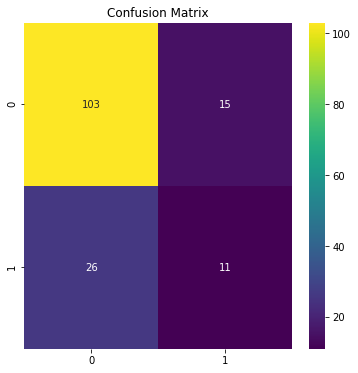

Auccuracy: 73.54838709677419%
Precision: 42.30769230769231%
Recall: 29.72972972972973%
f1 score: 34.920634920634924%
AUC SCORE: 75.1030691708658%


In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
cm = confusion_matrix(ytest,ypred)
sb.heatmap(cm,annot=True,cmap="viridis",fmt='g')
plt.show()
print(f"Auccuracy: {accuracy_score(ytest,ypred)*100}%")
print(f"Precision: {precision_score(ytest,ypred)*100}%")
print(f"Recall: {recall_score(ytest,ypred)*100}%")
print(f"f1 score: {f1_score(ytest,ypred)*100}%")
print(f"AUC SCORE: {auc(fpr,tpr)*100}%")

# Cross Validation 

In [22]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier, X=xtrain,y=np.ravel(ytrain), cv=10)
print(f"Accuracy = {accuracy.mean()*100}%")
print(f"Standard Deviation = {accuracy.std()*100}%")

Accuracy = 86.77062374245473%
Standard Deviation = 5.524714548385594%


# -----------------------------------------END-------------------------------------------------------

# \#------------------------------XGBoost---------------------------------------#

In [23]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False )
model.fit(xtrain,np.ravel(ytrain))

[14:29:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

# GridSearchCV

In [24]:
param_grid = {
    'n_estimators'      : [10,20,30,40,50,60,70],
    'learning_rate'         : [0.1,0.2,0.3,0.4,0.5],
    'random_state'      : [0],
    'use_label_encoder' :[True,False]
}
grid_search = GridSearchCV(model ,param_grid,refit = True, verbose=0,n_jobs=-1,scoring='f1',cv=10)
grid_search.fit(xtrain,np.ravel(ytrain))
grid_search.best_params_

[14:30:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


{'learning_rate': 0.3,
 'n_estimators': 70,
 'random_state': 0,
 'use_label_encoder': True}

# Ratraining 

In [25]:
model = XGBClassifier(
    learning_rate = 0.2,
    n_estimators=70,
    random_state=0,
    use_label_encoder=True)
model.fit(xtrain,np.ravel(ytrain))

[14:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Prediction

In [26]:
ypred = model.predict(xtest)

# ROC AUC

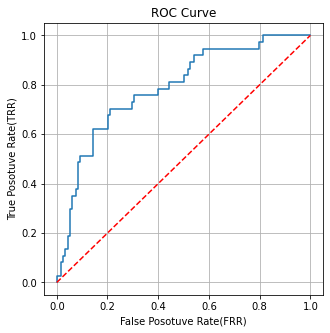

In [27]:
from sklearn.metrics import roc_curve, auc
ll=[0,1]
ur=[0,1]

plt.figure(figsize=(5,5))
y_pred_prob = model.predict_proba(xtest)
fpr, tpr, thresholds = roc_curve(ytest,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot(ll,ur,"--r")
plt.title("ROC Curve")
plt.xlabel("False Posotuve Rate(FRR)")
plt.ylabel("True Posotuve Rate(TRR)")
plt.grid(True)
plt.show()

# Confusion Matrix

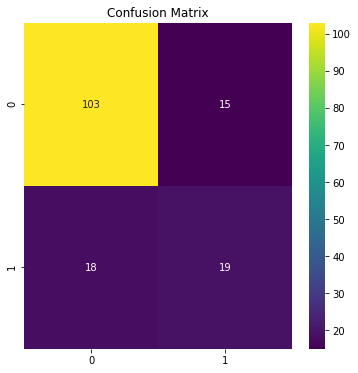

Auccuracy: 78.70967741935485%
Precision: 55.88235294117647%
Recall: 51.35135135135135%
f1 score: 53.521126760563384%
AUC SCORE: 78.60742098030234%


In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
cm = confusion_matrix(ytest,ypred)
sb.heatmap(cm,annot=True,cmap="viridis",fmt='g')
plt.show()
print(f"Auccuracy: {accuracy_score(ytest,ypred)*100}%")
print(f"Precision: {precision_score(ytest,ypred)*100}%")
print(f"Recall: {recall_score(ytest,ypred)*100}%")
print(f"f1 score: {f1_score(ytest,ypred)*100}%")
print(f"AUC SCORE: {auc(fpr,tpr)*100}%")

# Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X=xtrain,y=np.ravel(ytrain), cv=10)
print(f"Accuracy = {accuracy.mean()*100}%")
print(f"Standard Deviation = {accuracy.std()*100}%")

[14:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is depre

[14:30:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:30:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 85.92152917505031%
Standard Deviation = 5.994625656520881%


# \#------------------------------Naive Bayes---------------------------------------#

In [30]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(xtrain,np.ravel(ytrain))

GaussianNB()

# GridSearchCV

In [31]:
param_grid = {
    'var_smoothing'      : [0.01,0.02,0.03,0.1,0.2,0.3],
}
grid_search = GridSearchCV(model ,param_grid,refit = True, verbose=0,n_jobs=-1,scoring='f1',cv=10)
grid_search.fit(xtrain,np.ravel(ytrain))
grid_search.best_params_

{'var_smoothing': 0.2}

# Retraining

In [32]:
model = GaussianNB(
    var_smoothing=0.02
)
model.fit(xtrain,np.ravel(ytrain))

GaussianNB(var_smoothing=0.02)

# Prediction

In [33]:
ypred=model.predict(xtest)

# ROC AUC 

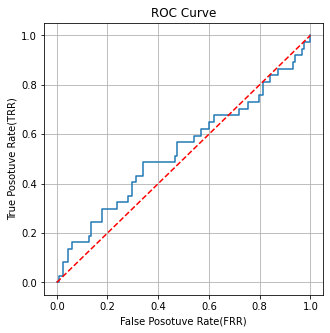

In [34]:
from sklearn.metrics import roc_curve, auc
ll=[0,1]
ur=[0,1]

plt.figure(figsize=(5,5))
y_pred_prob = model.predict_proba(xtest)
fpr, tpr, thresholds = roc_curve(ytest,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot(ll,ur,"--r")
plt.title("ROC Curve")
plt.xlabel("False Posotuve Rate(FRR)")
plt.ylabel("True Posotuve Rate(TRR)")
plt.grid(True)
plt.show()

# Confusion Matrix

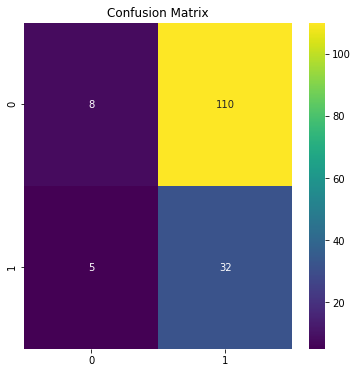

Auccuracy: 25.806451612903224%
Precision: 22.535211267605636%
Recall: 86.48648648648648%
f1 score: 35.754189944134076%
AUC SCORE: 53.43563902885937%


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
cm = confusion_matrix(ytest,ypred)
sb.heatmap(cm,annot=True,cmap="viridis",fmt='g')
plt.show()
print(f"Auccuracy: {accuracy_score(ytest,ypred)*100}%")
print(f"Precision: {precision_score(ytest,ypred)*100}%")
print(f"Recall: {recall_score(ytest,ypred)*100}%")
print(f"f1 score: {f1_score(ytest,ypred)*100}%")
print(f"AUC SCORE: {auc(fpr,tpr)*100}%")

# Cross Validation

In [36]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X=xtrain,y=np.ravel(ytrain), cv=10)
print(f"Accuracy = {accuracy.mean()*100}%")
print(f"Standard Deviation = {accuracy.std()*100}%")

Accuracy = 54.99195171026157%
Standard Deviation = 3.0319528222635985%


# -------------------------------------END------------------------------------------------------------------

#  \#------------------------------SVM---------------------------------------#

In [37]:
from sklearn.svm import SVC
model = SVC(kernel="linear")
model.fit(xtrain,np.ravel(ytrain))

SVC(kernel='linear')

# GridSearchCV 

In [38]:
param_grid = {
    'C': [1.0,3.0,5.0],
    "kernel": ["linear","rbf","poly","sigmoid"],
    "shrinking":[True,False],
    "gamma":["auto",1,0.1],
    "coef0":[0.0,0.1,0.5]
}
grid_search = GridSearchCV(model ,param_grid,refit = True, verbose=10,n_jobs=-1,scoring='f1',cv=10)
grid_search.fit(xtrain,np.ravel(ytrain))
grid_search.best_params_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


{'C': 5.0, 'coef0': 0.0, 'gamma': 0.1, 'kernel': 'rbf', 'shrinking': True}

# Retraining

In [39]:
model = SVC(
    C=3.0, 
    coef0=0.0, 
    gamma=0.1, 
    kernel='rbf', 
    shrinking=True,
    probability =True,
    
)
model.fit(xtrain,np.ravel(ytrain))

SVC(C=3.0, gamma=0.1, probability=True)

# Prediction

In [40]:
ypred = model.predict(xtest)

# ROC AUC

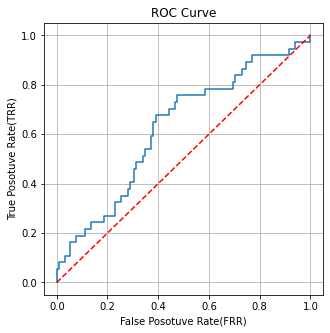

In [41]:
from sklearn.metrics import roc_curve, auc
ll=[0,1]
ur=[0,1]

plt.figure(figsize=(5,5))
y_pred_prob = model.predict_proba(xtest)
y_pred_prob
fpr, tpr, thresholds = roc_curve(ytest,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot(ll,ur,"--r")
plt.title("ROC Curve")
plt.xlabel("False Posotuve Rate(FRR)")
plt.ylabel("True Posotuve Rate(TRR)")
plt.grid(True)
plt.show()

# Confusion Matrix

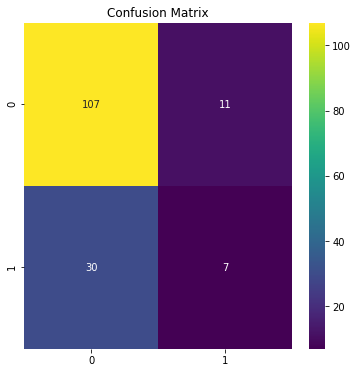

Auccuracy: 73.54838709677419%
Precision: 38.88888888888889%
Recall: 18.91891891891892%
f1 score: 25.454545454545457%
AUC SCORE: 62.41410902427852%


In [42]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
cm = confusion_matrix(ytest,ypred)
sb.heatmap(cm,annot=True,cmap="viridis",fmt='g')
plt.show()
print(f"Auccuracy: {accuracy_score(ytest,ypred)*100}%")
print(f"Precision: {precision_score(ytest,ypred)*100}%")
print(f"Recall: {recall_score(ytest,ypred)*100}%")
print(f"f1 score: {f1_score(ytest,ypred)*100}%")
print(f"AUC SCORE: {auc(fpr,tpr)*100}%")

# Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X=xtrain,y=np.ravel(ytrain), cv=10)
print(f"Accuracy = {accuracy.mean()*100}%")
print(f"Standard Deviation = {accuracy.std()*100}%")

Accuracy = 90.8933601609658%
Standard Deviation = 3.5743967035441235%


# #----------------------------KNN------------------------------------#

In [44]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain,np.ravel(ytrain))

KNeighborsClassifier(n_neighbors=3)

#  GridSearchCV

In [45]:
param_grid = {
    'n_neighbors': [3,5,7],
    "weights":['uniform', 'distance'],
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    
}
grid_search = GridSearchCV(model ,param_grid,refit = True, verbose=0,n_jobs=-1,scoring='f1',cv=10)
grid_search.fit(xtrain,np.ravel(ytrain))
grid_search.best_params_

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}

# Retraining

In [46]:
model = KNeighborsClassifier(
    algorithm='auto', 
    n_neighbors=3, 
    weights='distance')
model.fit(xtrain,np.ravel(ytrain))

KNeighborsClassifier(n_neighbors=3, weights='distance')

# Prediction

In [47]:
ypred = model.predict(xtest)

# ROC AUC

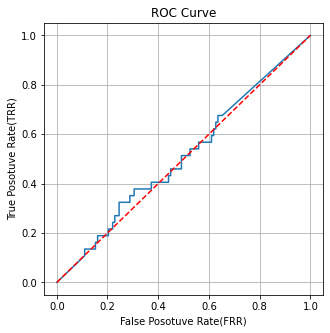

In [48]:
from sklearn.metrics import roc_curve, auc
ll=[0,1]
ur=[0,1]

plt.figure(figsize=(5,5))
y_pred_prob = model.predict_proba(xtest)
fpr, tpr, thresholds = roc_curve(ytest,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot(ll,ur,"--r")
plt.title("ROC Curve")
plt.xlabel("False Posotuve Rate(FRR)")
plt.ylabel("True Posotuve Rate(TRR)")
plt.grid(True)
plt.show()

# Confusion Matrix

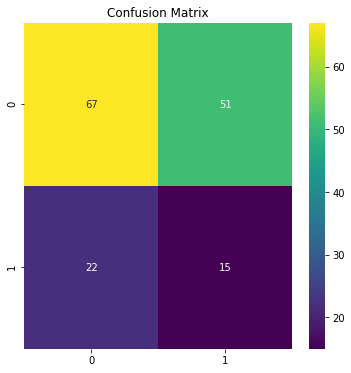

Auccuracy: 52.903225806451616%
Precision: 22.727272727272727%
Recall: 40.54054054054054%
f1 score: 29.126213592233007%
AUC SCORE: 51.03069170865781%


In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
cm = confusion_matrix(ytest,ypred)
sb.heatmap(cm,annot=True,cmap="viridis",fmt='g')
plt.show()
print(f"Auccuracy: {accuracy_score(ytest,ypred)*100}%")
print(f"Precision: {precision_score(ytest,ypred)*100}%")
print(f"Recall: {recall_score(ytest,ypred)*100}%")
print(f"f1 score: {f1_score(ytest,ypred)*100}%")
print(f"AUC SCORE: {auc(fpr,tpr)*100}%")

# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X=xtrain,y=np.ravel(ytrain), cv=10)
print(f"Accuracy = {accuracy.mean()*100}%")
print(f"Standard Deviation = {accuracy.std()*100}%")

Accuracy = 78.34607645875252%
Standard Deviation = 5.562569208199484%


#  #---------------------------------LogisticRegression-------------------------------------------#

In [51]:
from sklearn.linear_model import LogisticRegression 
model = LogisticRegression()
model.fit(xtrain,np.ravel(ytrain))

LogisticRegression()

# GridSearchCV

In [52]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    "C":[1.0,2.0,3.0,4.0,5.0],
    "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "multi_class" :['auto', 'ovr', 'multinomial']
    
    
    
}
grid_search = GridSearchCV(model ,param_grid,refit = True, verbose=0,n_jobs=-1,scoring='f1',cv=10)
grid_search.fit(xtrain,np.ravel(ytrain))
grid_search.best_params_

c:\python38\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.69056403        nan 0.68523896 0.68417114
 0.68417114 0.68417114 0.68345407 0.68345407        nan        nan
        nan        nan        nan 0.70009694 0.69819734        nan
 0.68808765 0.68429506        nan        nan 0.69056403        nan
 0.68613806 0.68417114 0.68417114 0.68417114 0.68345407 0.68345407
        nan        nan        nan        nan        nan 0.70009694
 0.69819734        nan 0.68808765 0.68429506        nan        nan
        nan        nan 0.68957796 0.68693508 0.68693508        nan
 0.68613184 0.68339522        nan        nan        nan        nan
        nan 0.70009694 0.70111415        nan 0.68992443 0.68808765
        nan        nan 0.68983407        nan 0.68615885 0.68693508
 0.68693508 0.68693508 0.68339522 0.68429506        nan        nan
        nan        nan        nan 0.70009694 0.69819734        nan

{'C': 1.0, 'multi_class': 'multinomial', 'penalty': 'none', 'solver': 'lbfgs'}

# Retraining

In [53]:
model = LogisticRegression(
     C= 1.0, 
     multi_class='auto', 
     penalty= 'l2', 
     solver= 'liblinear',
     class_weight="balanced"
)
model.fit(xtrain,np.ravel(ytrain))

LogisticRegression(class_weight='balanced', solver='liblinear')

# Prediction

In [54]:
ypred = model.predict(xtest)

# ROC AUC

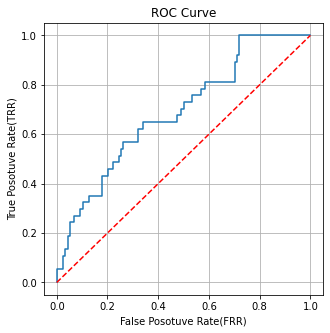

In [55]:
from sklearn.metrics import roc_curve, auc
ll=[0,1]
ur=[0,1]

plt.figure(figsize=(5,5))
y_pred_prob = model.predict_proba(xtest)
fpr, tpr, thresholds = roc_curve(ytest,y_pred_prob[:,1])
plt.plot(fpr,tpr)
plt.plot(ll,ur,"--r")
plt.title("ROC Curve")
plt.xlabel("False Posotuve Rate(FRR)")
plt.ylabel("True Posotuve Rate(TRR)")
plt.grid(True)
plt.show()

# Confusion Matrix

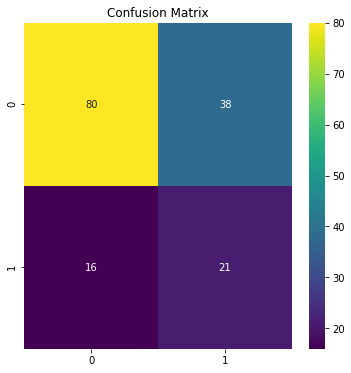

Auccuracy: 65.16129032258064%
Precision: 35.59322033898305%
Recall: 56.75675675675676%
f1 score: 43.75%
AUC SCORE: 68.91891891891892%


In [56]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
plt.figure(figsize=(6,6))
plt.title("Confusion Matrix")
cm = confusion_matrix(ytest,ypred)
sb.heatmap(cm,annot=True,cmap="viridis",fmt='g')
plt.show()
print(f"Auccuracy: {accuracy_score(ytest,ypred)*100}%")
print(f"Precision: {precision_score(ytest,ypred)*100}%")
print(f"Recall: {recall_score(ytest,ypred)*100}%")
print(f"f1 score: {f1_score(ytest,ypred)*100}%")
print(f"AUC SCORE: {auc(fpr,tpr)*100}%")

# Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, X=xtrain,y=np.ravel(ytrain), cv=10)
print(f"Accuracy = {accuracy.mean()*100}%")
print(f"Standard Deviation = {accuracy.std()*100}%")

Accuracy = 68.09054325955735%
Standard Deviation = 2.403571065911586%
